# Лабораторная работа №2

Леденцы

V1: освежить дыхание

V2: чувствовать себя увереннее

V3: освежить полость рта

V4: избавиться от неприятного вкуса

V5: заменитель сладкого

V6: хочется сладкого

V7: помогают сконцентрироваться

V8: отвлечься и подумать

V9: облегчить боль в горле

V10: избавиться от заложенности носа

V11: улучшить самочувствие

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Импорт данных

In [2]:
df = pd.read_csv('Леденцы.dat', sep=';')

print("Размер датасета:", df.shape)

print("\nПервые 5 строк данных:")
print(df.head())

print("\nОписательная статистика:")
print(df.describe())

Размер датасета: (338, 11)

Первые 5 строк данных:
   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0   4   5   5   5   3   3   3   3   3    3    3
1   5   4   5   5   3   3   3   3   3    3    3
2   5   5   4   5   3   3   3   3   3    3    3
3   5   4   5   5   3   3   3   3   3    3    3
4   4   5   5   5   3   3   3   3   3    3    3

Описательная статистика:
               V1          V2          V3          V4          V5          V6  \
count  338.000000  338.000000  338.000000  338.000000  338.000000  338.000000   
mean     3.544379    3.526627    3.517751    3.411243    3.207101    3.204142   
std      0.955748    0.956410    0.990150    0.992311    0.867314    0.869725   
min      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
25%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
50%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
75%      5.000000    5.000000    5.000000    4.000000    3.000000   

Общая информация о данных

* Количество характеристик: 11 переменных (V1-V11)
* Шкала оценок: от 2 до 5 баллов
* Медиана по большинству переменных = 3, что указывает на преобладание нейтральных оценок

# Стандартизируем данные

Чтобы переменные с разной дисперсией вносили равный вклад в кластеризацию проведена кластеризация, иначе алгоритм учитывал бы в первую очередь переменные с большим разбросом значений (как например, V4 имеет std=0.99, V7 имеет std=0.84)

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Кластеризация

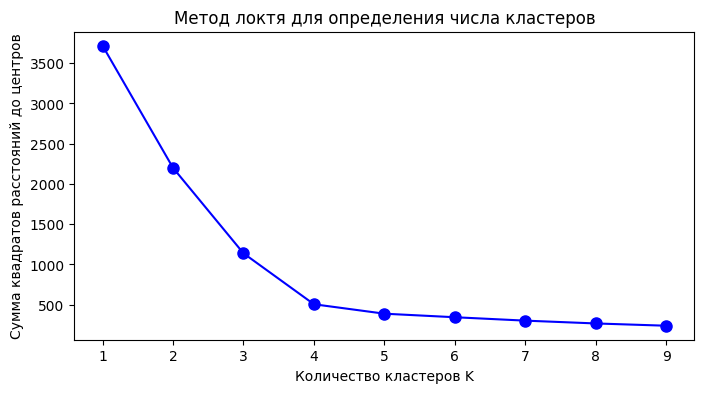

In [6]:
# Выбираем число кластеров. От 2 до 10
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Количество кластеров K')
plt.ylabel('Cумма квадратов расстояний до центров')
plt.title('Метод локтя для определения числа кластеров')
plt.show()

Анализ графика каменистой осыпи показывает выраженный "локоть" при переходе к четырем кластерам, что свидетельствует о максимальном выигрыше в качестве кластеризации на данном этапе, тогда как дальнейшее увеличение числа кластеров не дает существенного улучшения

In [11]:
#построение модели
model = KMeans(n_clusters=4, random_state=42, n_init=10)
model.fit(data_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [12]:
# Добавляем столбец cluster к таблице данных и выводим средние значения в каждом кластере
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
1,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000


In [17]:
print("Примеры строк по кластерам:\n")
for c in np.unique(model.labels_):
    print(f"\n=== Кластер {c} ===")
    print(df[df['cluster'] == c].head(5))  # ← исправлено на 'cluster'

Примеры строк по кластерам:


=== Кластер 0 ===
     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
110   3   2   2   2   3   2   2   3   5    5    5        0
111   3   3   3   3   3   3   3   3   5    5    5        0
112   2   4   4   4   2   2   2   3   5    5    5        0
113   3   3   3   3   3   3   3   3   5    5    5        0
114   3   3   3   3   3   3   3   3   5    5    5        0

=== Кластер 1 ===
     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
218   3   3   3   3   5   5   3   3   3    3    3        1
219   3   3   3   3   5   5   3   3   2    2    2        1
220   3   3   3   3   5   5   3   2   2    2    2        1
221   3   3   3   3   5   5   3   3   2    2    2        1
222   3   3   3   3   5   5   3   2   2    2    2        1

=== Кластер 2 ===
   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
0   4   5   5   5   3   3   3   3   3    3    3        2
1   5   4   5   5   3   3   3   3   3    3    3        2
2   5   5   4   5   3   3   3   3  

# Интерпретация результатов кластеризации

В результате кластерного анализа методом k-средних, респондентов можно выделить **четыре** основных кластера по целям потребления леденцов:

**Кластер 0 — «Леденцы для облегчения состояния» (V9-V11)**
Сюда входят респонденты, которые чаще всего употребляют леденцы для облегчения боли в горле, заложенности носа и улучшения самочувствия.  
Средние оценки по этим переменным значительно выше, чем по остальным.  
Вывод: Это «функциональные потребители», для которых леденцы выполняют скорее лечебную или поддерживающую функцию, чем развлекательную.

**Кластер 1 — «Леденцы для концентрации и отдыха» (V7-V8)**
Основные мотивации: помощь в концентрации, небольшой отдых и отвлечение.  
Вывод: Это «когнитивно-ориентированные потребители», которые используют леденцы как способ расслабления или повышения продуктивности.

**Кластер 2 — «Леденцы для свежести и уверенности» (V1-V4)**
Основная мотивация — освежение дыхания, ощущение уверенности, чистота полости рта, устранение неприятного вкуса.  
Средние оценки по этим признакам высоки.  
Вывод: Это «социально-ориентированные потребители», для которых леденцы являются инструментом поддержания комфорта в общении.

**Кластер 3 — «Леденцы как сладкое удовольствие» (V5-V6)**
Доминируют показатели «заменитель других кондитерских изделий» и «когда хочется чего-нибудь сладкого».  
Вывод: Эти потребители относятся к категории людей, для которых леденцы — просто приятное лакомство, источник сладости, без функциональной цели.
